In [12]:
import os
from collections import defaultdict
import numpy as np
# Define the directories and platforms
cpu_platforms = ["Pennylane", "Qiskit", "ProjectQ", "Qsun"]
hardware_platforms = ["FP32", "FX24", "FX32"]
num_gates = range(1, 401) 
colors = {
    'FX32': 'purple',
    'Qiskit': 'indigo',
    
}

orders = []
for i in range(10):
    file = np.loadtxt(f"../order/order/order_qubit{i}_10qubits.txt")
    orders.append(file)
orders = np.array(orders)
orders = np.max(orders, axis=0)

time_qiskit = np.loadtxt("../time/order/order_qiskit_cad114_10qubit.txt")
time_fx32 = np.loadtxt("../time/order/Order_FX32_Time.txt")

In [3]:
time_qiskit[-1]

0.021198718547821044

In [36]:
times_fx32 = []
for i in range(400):
    time = np.loadtxt(f"../time/FX32_Order/Execution_Time/circuit_{i}_10qubit_time.txt")
    times_fx32.append(time)
np.savetxt("../time/order/Order_FX32_Time.txt", np.array(times_fx32))

In [41]:
time_qiskit[-1]



0.021198718547821044

In [38]:
slope, intercept = np.polyfit(range(400), time_qiskit, 1)

print("Slope:", slope)

slope, intercept = np.polyfit(range(400), times_fx32, 1)

print("Slope:", slope)


Slope: 5.097926860876419e-05
Slope: 4.758245645285284e-06


In [39]:
5.097926860876419e-05/4.758245645285284e-06

10.713879107791984

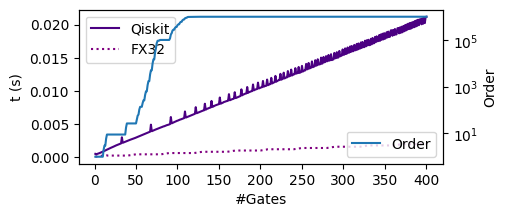

In [28]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(4.7, 2))
axs.plot(num_gates, time_qiskit, label = 'Qiskit', color=colors['Qiskit'])
axs.plot(num_gates, time_fx32, linestyle = 'dotted', label = 'FX32', color=colors['FX32'])
ax2 = axs.twinx()
ax2.plot(num_gates, orders, label = 'Order')
axs.set_ylabel('t (s)')
ax2.set_ylabel('Order')
ax2.set_yscale('log')
axs.set_xticks(range(0, 401, 50))
axs.set_xticklabels(range(0, 401, 50))
axs.set_xlabel("#Gates")


axs.legend()
ax2.legend()
plt.savefig("../images/time_order.svg", bbox_inches='tight')

In [ ]:
# Create a twin y-axis
ax2 = axs.twinx()

# Plot data on the twin y-axis
ax2.plot(num_gates, orders, color='red')

# Set labels for the twin y-axis

ax2.tick_params(axis='y', labelcolor='red')

ModuleNotFoundError: No module named 'qimax'